- Học và tên: PHẠM THỊ HOÀ
- MSHV: 23C23007

In [1]:
library(faraway)
library(MASS)

In [2]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)

In [3]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "insurance.csv", sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = TRUE, sep = ",")
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [4]:
# Kiểm tra số dòng và số cột của dữ liệu:
dim(df)

[1] 1338    7

- Bộ dữ liệu gồm có 1338 dòng và 7 cột

### NỘI DUNG CÁC CỘT DỮ LIỆU
- age: Tuổi của người được bảo hiểm.
- sex: Giới tính của người được bảo hiểm
- bmi: Chỉ số khối cơ thể (Body Mass Index - BMI) của người được bảo hiểm. Chỉ số này được tính bằng cách chia cân nặng (kg) cho bình phương chiều cao (m)
- children: Số con của người được bảo hiểm.
- smoker: Trạng thái hút thuốc của người được bảo hiểm
    - yes: Có hút thuốc
    - no: Không hút thuốc 
- region: Vùng miền nơi người được bảo hiểm sinh sống.
    - northeast: Đông Bắc
    - northwest: Tây Bắc
    - southeast: Đông Nam
    - southwest: Tây Nam
- charges: Số tiền bảo hiểm y tế phải trả

In [5]:
# Kiểm tra dữ liệu
str(df) # Xem cấu trúc dữ liệu

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [6]:
summary(df)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

- age (tuổi: 18-64, trung bình: 39.21),
- sex (giới tính: 2 loại female hoặc male),
- bmi (chỉ số BMI: 15.96-53.13, trung bình: 30.66),
- children (số con: 0-5, trung bình: 1.095),
- smoker (hút thuốc: có hút thuốc: yes, không hút thuốc: no)
- region (vùng miền: northeast: Đông Bắc, northwest: Tây Bắc, southeast: Đông Nam, southwest: Tây Nam)
- charges (phí bảo hiểm: 1122-63770, trung bình: 13270)

In [7]:
# Kiểm tra dữ liệu unique của bộ dữ liệu
for (col in colnames(df)) {
    print(col)
    print(length(unique(df[[col]])))
}


[1] "age"
[1] 47
[1] "sex"
[1] 2
[1] "bmi"
[1] 548
[1] "children"
[1] 6
[1] "smoker"
[1] 2
[1] "region"
[1] 4
[1] "charges"
[1] 1337


In [8]:
colSums(is.na(df))

age      sex      bmi children   smoker   region  charges 
       0        0        0        0        0        0        0

- Không có dữ liệu thiếu

# LỰA CHỌN BÀI TOÁN:
- Y: biến charges
- X1: region: Vị trí địa lý
- X2: sex: Giới tính
- Mô hình two-way ANOVA sẽ phân tích ảnh hưởng của vị trí địa lý (region) và giới tính (sex) lên phí bảo hiểm (charges), cùng với tương tác giữa hai yếu tố này.

In [9]:
# Giữa lại các cột dữ liệu cần phân tích
df = df[, c("charges", "region", "sex")]
df[["region"]] = as.factor(df[["region"]])
df[["sex"]] = as.factor(df[["sex"]])
head(df)

,charges,region,sex
,<dbl>,<fct>,<fct>
1,16884.924,southwest,female
2,1725.552,southeast,male
3,4449.462,southeast,male
4,21984.471,northwest,male
5,3866.855,northwest,male
6,3756.622,southeast,female


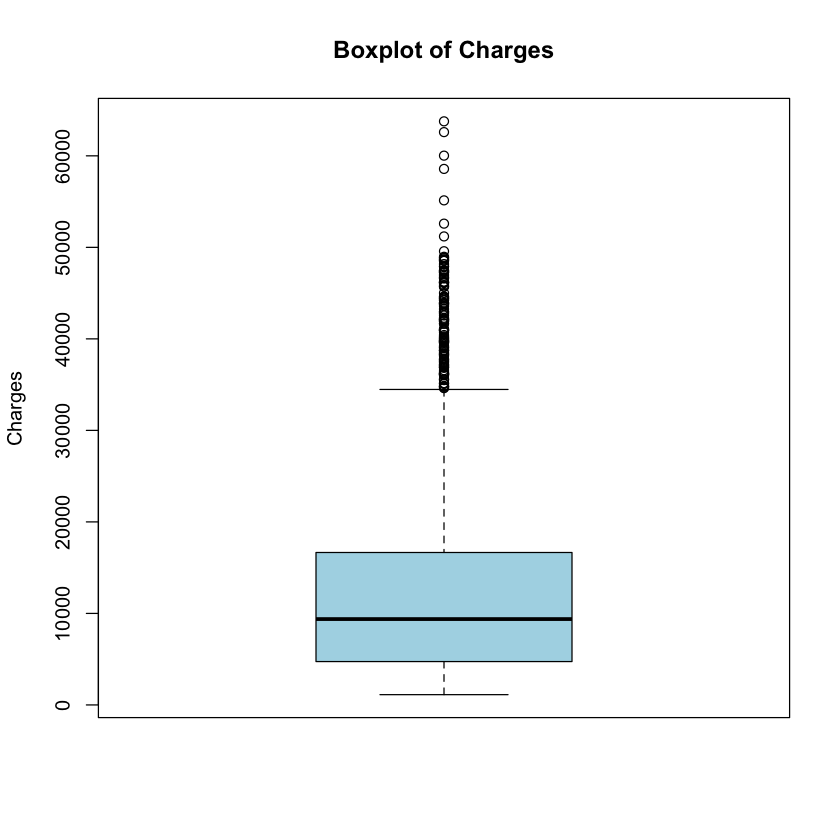

In [10]:
boxplot(df$charges, main = "Boxplot of Charges", ylab = "Charges", col = "lightblue")

In [11]:
# Loại bỏ các giá trị ngoại lai dựa trên IQR
Q1 <- quantile(df$charges, 0.25)
Q3 <- quantile(df$charges, 0.75)
IQR <- Q3 - Q1

df <- df[df$charges >= (Q1 - 1.5 * IQR) & df$charges <= (Q3 + 1.5 * IQR), ]

In [12]:
str(df)

'data.frame':	1199 obs. of  3 variables:
 $ charges: num  16885 1726 4449 21984 3867 ...
 $ region : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ sex    : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...


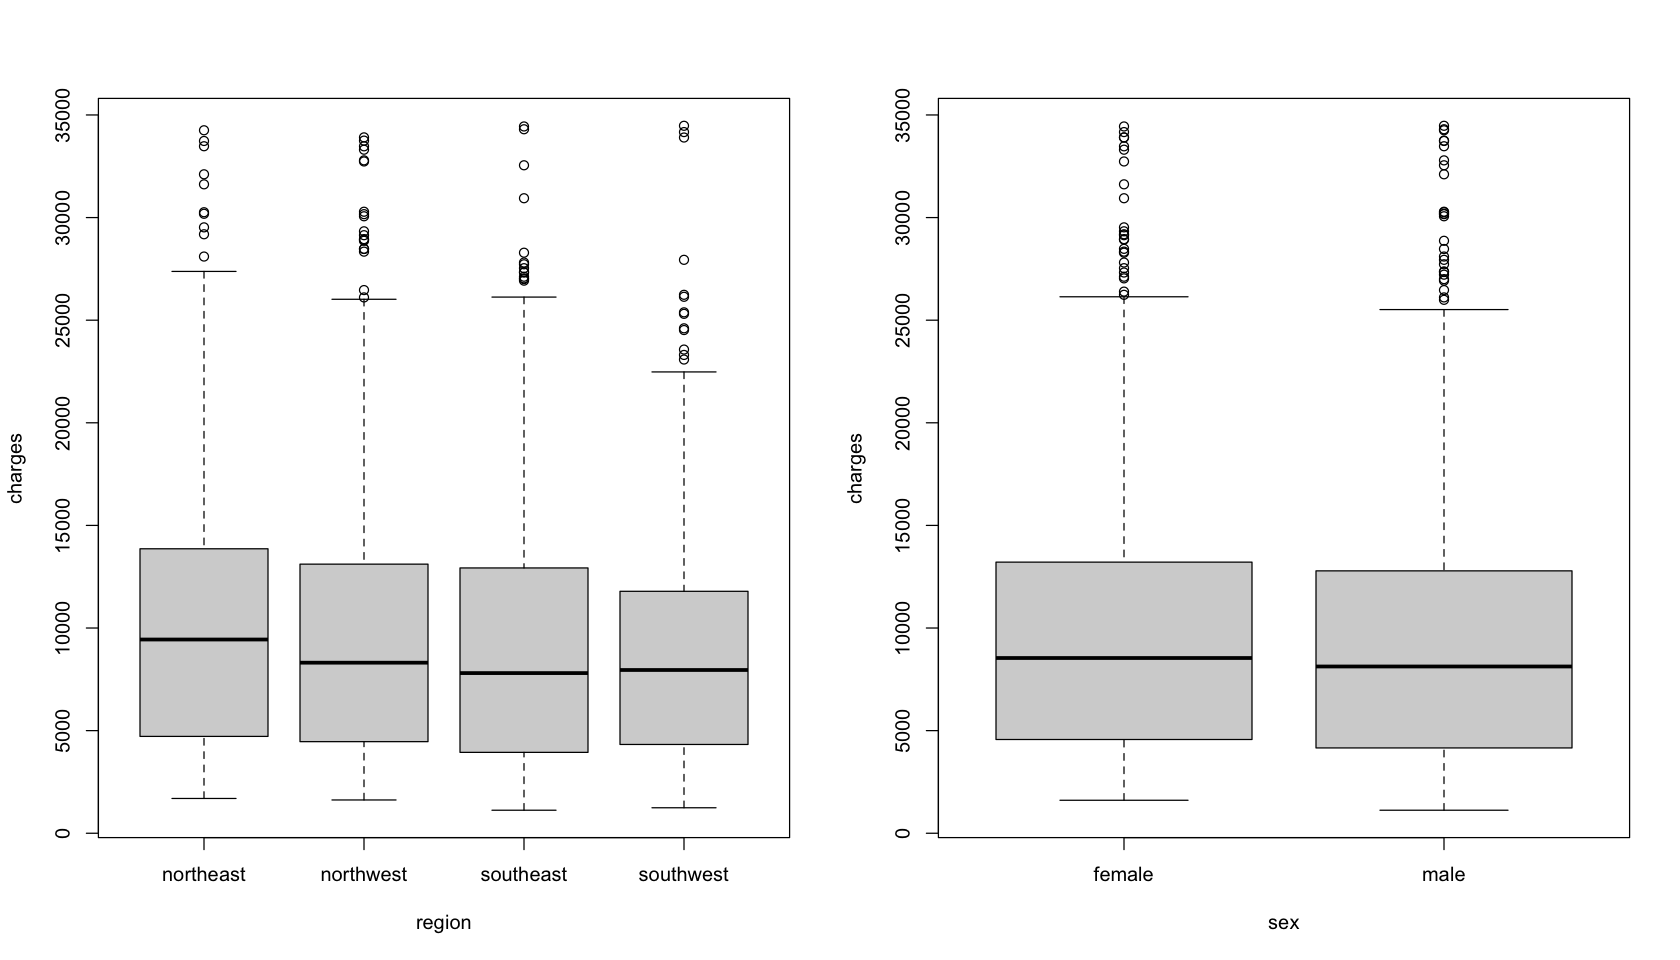

In [13]:
options(repr.plot.width = 14, repr.plot.height = 8)
par(mfrow = c(1, 2), mar = c(5, 4, 4, 2) + 0.1)
plot(charges ~ region, data = df)
plot(charges ~ sex, data = df)

- Các giá trị charges (phí bảo hiểm) phân bố khác nhau tùy theo khu vực (region).
Khu vực southeast có mức median (giá trị trung bình) cao nhất so với các khu vực khác (northeast, northwest, southwest).
- Khu vực southeast cũng có nhiều giá trị ngoại lệ (outliers) với phí bảo hiểm rất cao.
- Các khu vực khác như northeast, northwest, và southwest có mức median gần như nhau, nhưng southwest có xu hướng phí bảo hiểm thấp hơn một chút.
- Các giá trị charges phân bố tương tự nhau giữa hai giới tính (sex), với mức median gần như tương đương.
- Cả hai nhóm giới tính đều có nhiều giá trị ngoại lệ với phí bảo hiểm rất cao.
- Nhìn chung, 
    - không có sự khác biệt đáng kể giữa trung bình phí bảo hiểm của nam và nữ,
    - Không có sự khác biệt đáng kể giữa trung bình phí bảo hiểm giữa các vùng


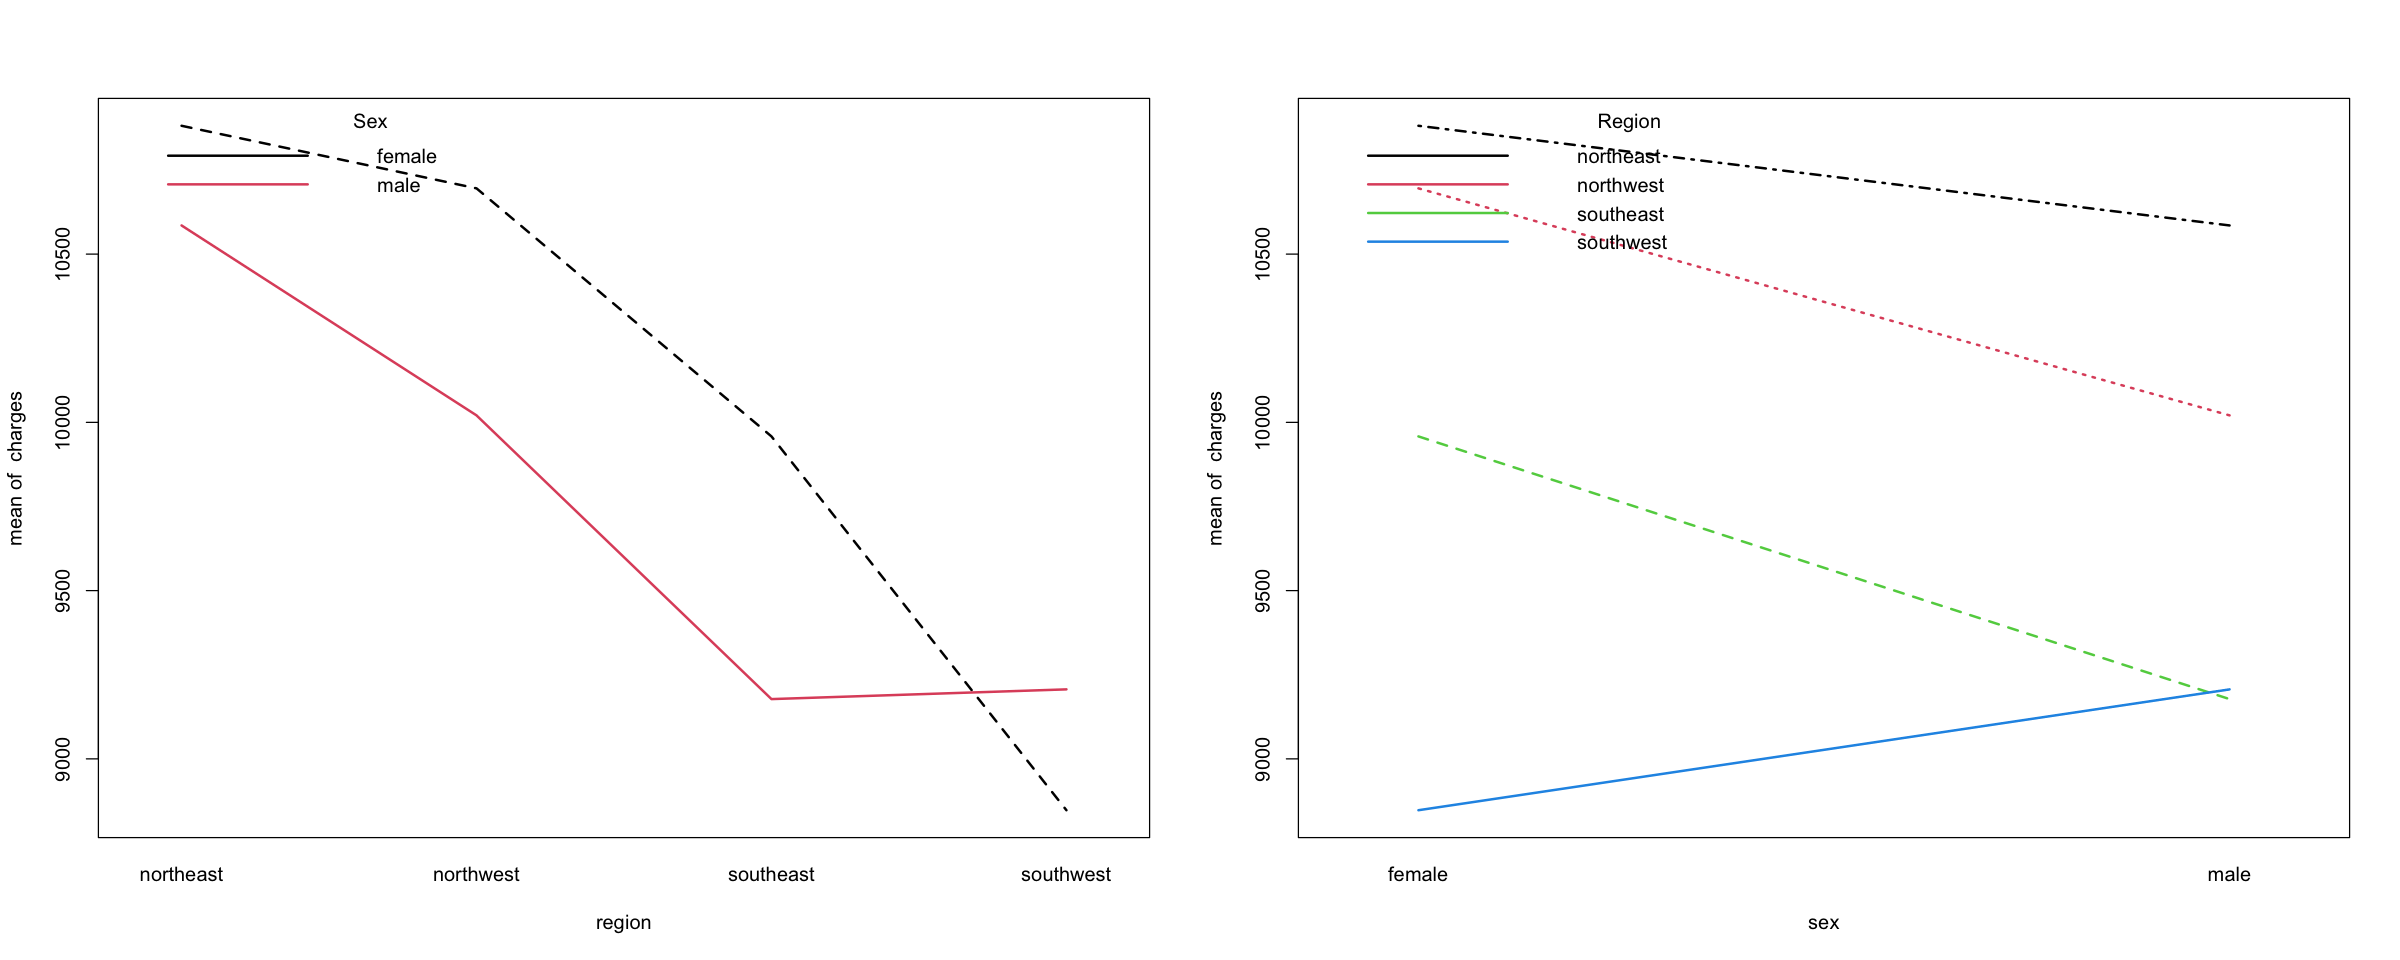

In [14]:
options(repr.plot.width = 20, repr.plot.height = 8)
par(mfrow = c(1, 2), mar = c(5, 4, 4, 2) + 0.1, xpd = TRUE)

with(df, interaction.plot(region, sex, charges, lwd = 2, col = 1:2, legend = FALSE))
legend("topleft", legend = levels(df$sex), col = 1:2, lwd = 2, bty = "n", title = "Sex")

with(df, interaction.plot(sex, region, charges, lwd = 2, col = 1:4, legend = FALSE))
legend("topleft", legend = levels(df$region), col = 1:4, lwd = 2, bty = "n", title = "Region")


- Chi phí bảo hiểm trung bình cho nữ thay đổi nhẹ nhàng hơn giữa các vùng so với nam.
- Đối với nam, chi phí bảo hiểm trung bình cao nhất ở vùng northeast và thấp nhất ở vùng northwest.
- Đối với nữ, chi phí trung bình gần như tương đối đồng đều giữa các vùng northeast, northwest, và southwest.
- Chi phí trung bình cho cả nam và nữ là cao nhất ở vùng northeast và thấp nhất ở vùng southwest.
- Đường kẻ đại diện cho vùng southeast có độ dốc cao nhất, chỉ ra rằng chi phí trung bình tăng nhanh hơn ở vùng này khi chuyển từ nữ sang nam.
- Có sự tương tác rõ ràng giữa giới tính và vùng đối với chi phí bảo hiểm y tế.
- Chi phí trung bình cho nam thường cao hơn so với nữ.
- Vùng northeast có chi phí trung bình cao nhất cho cả hai giới, trong khi vùng southwest có chi phí trung bình thấp nhất.
- Dựa trên các biểu đồ này, có vẻ như có sự tương tác giữa giới tính và vùng miền, vì các đường không song song trong cả hai biểu đồ. Điều này cho thấy rằng tác động của một yếu tố (ví dụ: giới tính) lên trung bình của chi phí phụ thuộc vào mức độ của yếu tố khác (ví dụ: vùng miền)

### MÔ HÌNH NHÂN

In [15]:
insurance_int = aov(charges~region*sex, data = df)
insurance_int

Call:
   aov(formula = charges ~ region * sex, data = df)

Terms:
                     region         sex  region:sex   Residuals
Sum of Squares    528808301    38300025    59018633 62190252673
Deg. of Freedom           3           1           3        1191

Residual standard error: 7226.122
Estimated effects may be unbalanced

In [16]:
summary(insurance_int)

              Df    Sum Sq   Mean Sq F value Pr(>F)  
region         3 5.288e+08 176269434   3.376 0.0178 *
sex            1 3.830e+07  38300025   0.733 0.3919  
region:sex     3 5.902e+07  19672878   0.377 0.7698  
Residuals   1191 6.219e+10  52216837                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- Với mức ý nghĩa 5%:
- Giả thuyết H0 cho tương tác giữa giới tính (sex) và vùng miền (region): Không có sự tương tác giữa giới tính và vùng miền đối với chi phí trung bình.
Kết quả: Giá trị p = 0.5062 > 0.05, không bác bỏ H0. Có nghĩa là không có sự tương tác đáng kể giữa giới tính và vùng miền đối với chi phí bảo hiểm trung bình.
- => Chúng ta khôn gtheer sử dụng mô hình này

### MÔ HÌNH CỘNG

In [17]:
insurance_add = aov(charges~region+sex, data = df)
insurance_add

Call:
   aov(formula = charges ~ region + sex, data = df)

Terms:
                     region         sex   Residuals
Sum of Squares    528808301    38300025 62249271306
Deg. of Freedom           3           1        1194

Residual standard error: 7220.462
Estimated effects may be unbalanced

In [18]:
summary(insurance_add)

              Df    Sum Sq   Mean Sq F value Pr(>F)  
region         3 5.288e+08 176269434   3.381 0.0177 *
sex            1 3.830e+07  38300025   0.735 0.3916  
Residuals   1194 6.225e+10  52135068                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- 1. Giả thuyết H0 cho biến vùng miền (region): Vùng miền không ảnh hưởng đến chi phí trung bình.
    - Kết quả: Df = 3, Sum Sq = 1.301e+09, Mean Sq = 433586560, F value = 2.977, Pr(>F) = 0.0306.
    - Giá trị p = 0.0306 < 0.05, bác bỏ H0. Kết luận: Vùng miền có ảnh hưởng đáng kể đến chi phí trung bình.
- 2. Giả thuyết H0 cho biến giới tính (sex): Giới tính không ảnh hưởng đến chi phí trung bình.
    - Kết quả: Df = 1, Sum Sq = 6.131e+08, Mean Sq = 613069167, F value = 4.209, Pr(>F) = 0.0404.
    - Giá trị p = 0.0404 < 0.05, bác bỏ H0. Kết luận: Giới tính có ảnh hưởng đáng kể đến chi phí trung bình.
- => Cả hai yếu tố này đều ảnh hưởng đến chi phí trung bình


### KIỂM TRA PHÂN PHỐI CỦA PHẦN DƯ

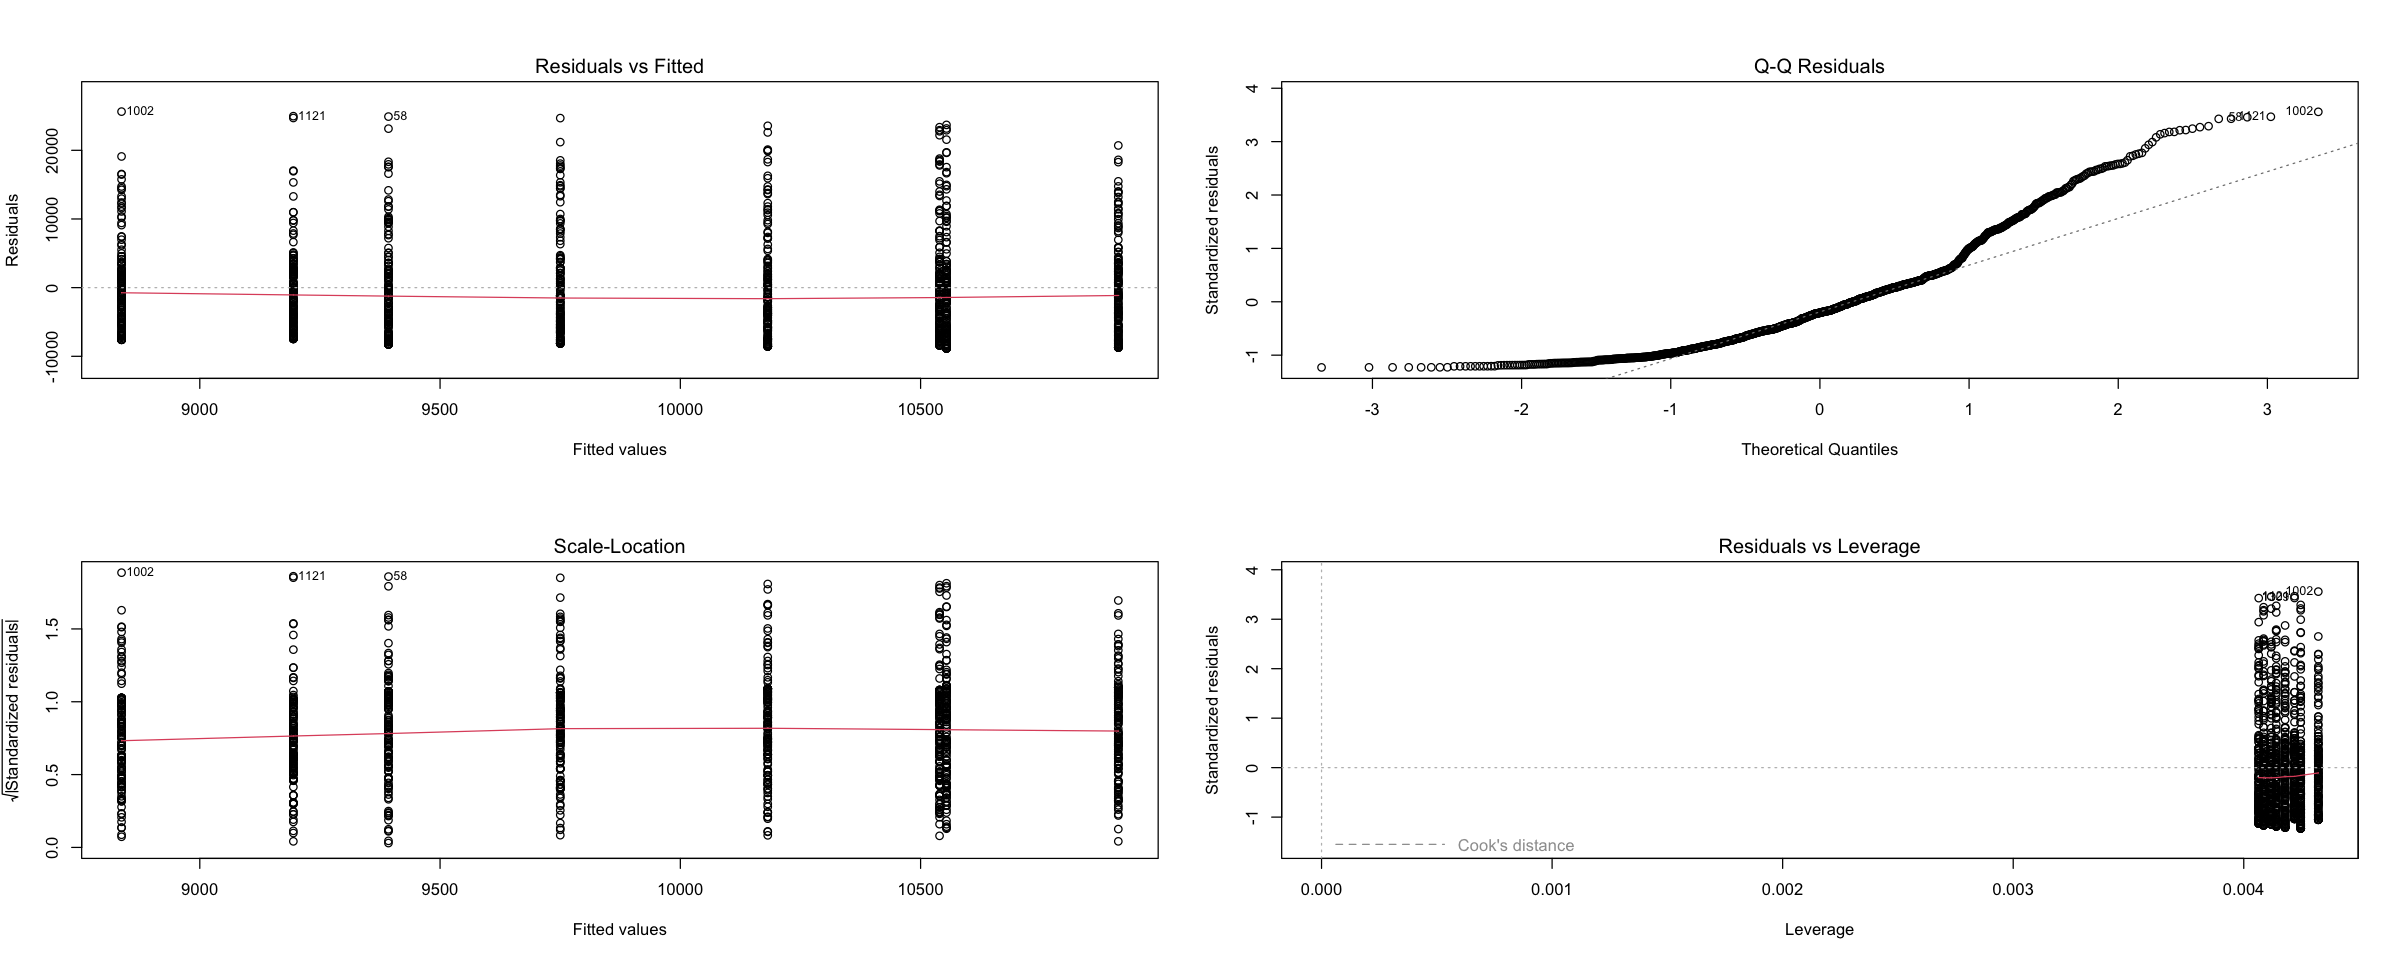

In [19]:
# Plot residuals
par(mfrow = c(2, 2))
plot(insurance_add)

In [20]:
shapiro.test(residuals(insurance_add))


	Shapiro-Wilk normality test

data:  residuals(insurance_add)
W = 0.89668, p-value < 2.2e-16


- Giả thuyết không (H0): Phần dư tuân theo phân phối chuẩn.
- Giả thuyết đối (H1): Phần dư không tuân theo phân phối chuẩn.
- Giá trị p < 0.05 (cụ thể là rất nhỏ, < 2.2e-16), do đó chúng ta bác bỏ giả thuyết không (H0) hay nói cách khác thì phần dư không tuân theo phân phối chuẩn. 
- => Mô hình không thoả, chúng ta cần dùng một kiểm định khác hoặc biến đổi Boxcox để được mô hình có ý nghĩa

### KIỂM ĐỊNH KRUSKAL-WALLIS

In [21]:
# Kiểm định Kruskal-Wallis cho charges theo sex
kruskal_test_sex <- kruskal.test(charges ~ sex, data = df)
print(kruskal_test_sex)


	Kruskal-Wallis rank sum test

data:  charges by sex
Kruskal-Wallis chi-squared = 2.7095, df = 1, p-value = 0.09975



- Giả thiết H0: Không có sự khác biệt đáng kể về charges giữa các nhóm sex (nam và nữ).
- Dựa vào kết quả của kiểm định Kruskal-Wallis cho biến phụ thuộc charges theo biến độc lập sex, ta có:

    - Giá trị Kruskal-Wallis chi-squared = 0.1204
    - Độ tự do (df) = 1
    - Giá trị p-value = 0.7286
- Với p-value = 0.7286 lớn hơn 0.05, chúng ta không có đủ bằng chứng để bác bỏ giả thiết H0. Do đó, không có sự khác biệt đáng kể về charges giữa nam và nữ.

In [22]:
# Kiểm định Kruskal-Wallis cho charges theo region
kruskal_test_region <- kruskal.test(charges ~ region, data = df)
print(kruskal_test_region)


	Kruskal-Wallis rank sum test

data:  charges by region
Kruskal-Wallis chi-squared = 10.715, df = 3, p-value = 0.01337



- Giả thiết H0: Không có sự khác biệt đáng kể về charges giữa các nhóm region
- Dựa vào kết quả của kiểm định Kruskal-Wallis cho biến phụ thuộc charges theo biến độc lập region, ta có:

    - Giá trị Kruskal-Wallis chi-squared = 4.7342
    - Độ tự do (df) = 3
    - Giá trị p-value = 0.1923
- Kết luận: Với p-value = 0.1923 lớn hơn 0.05, chúng ta không có đủ bằng chứng để bác bỏ giả thiết H0. Do đó, không có sự khác biệt đáng kể về charges giữa các vùng miền.

### LỜI DẪN
Vì kết quả của kiểm định Kruskal-Wallis cho thấy không có sự khác biệt đáng kể giữa trung bình phí bảo hiểm (charges) giữa các nhóm sex và region, nên tôi muốn thực hiện thêm biến đổi Box-Cox để củng cố chắc chắn hơn kết quả phân tích này.

### BIẾN ĐỔI BOX-COX

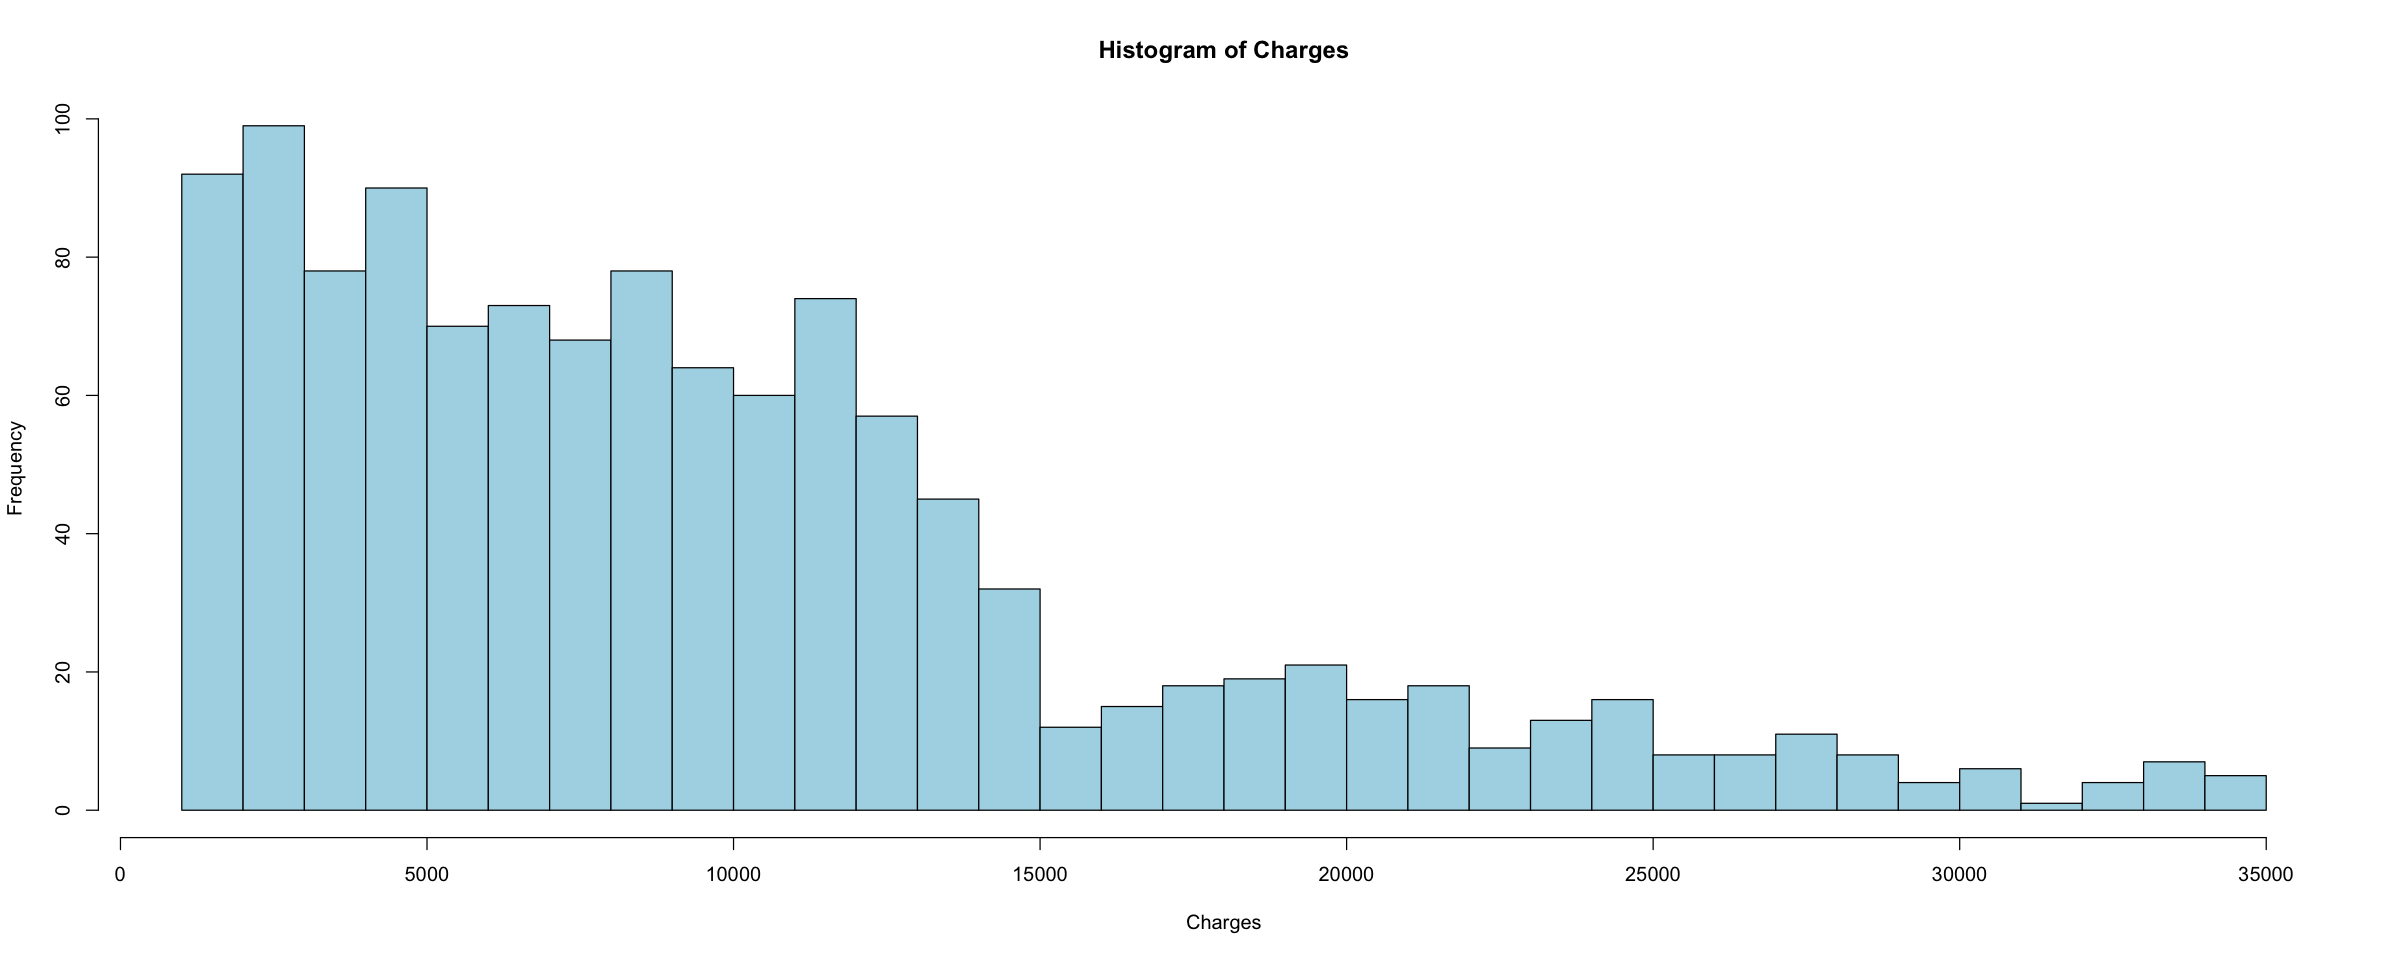

In [23]:
# Vẽ biểu đồ histogram cho cột 'charges'
hist(df$charges, 
     breaks = 30, 
     main = "Histogram of Charges", 
     xlab = "Charges", 
     ylab = "Frequency", 
     col = "lightblue", 
     border = "black")

- Nhìn vào đồ thị histogram cho thấy dữ liệu của biến charges có sự lệch phải khá mạnh

[1] "Best lambda: 0.181818181818182"


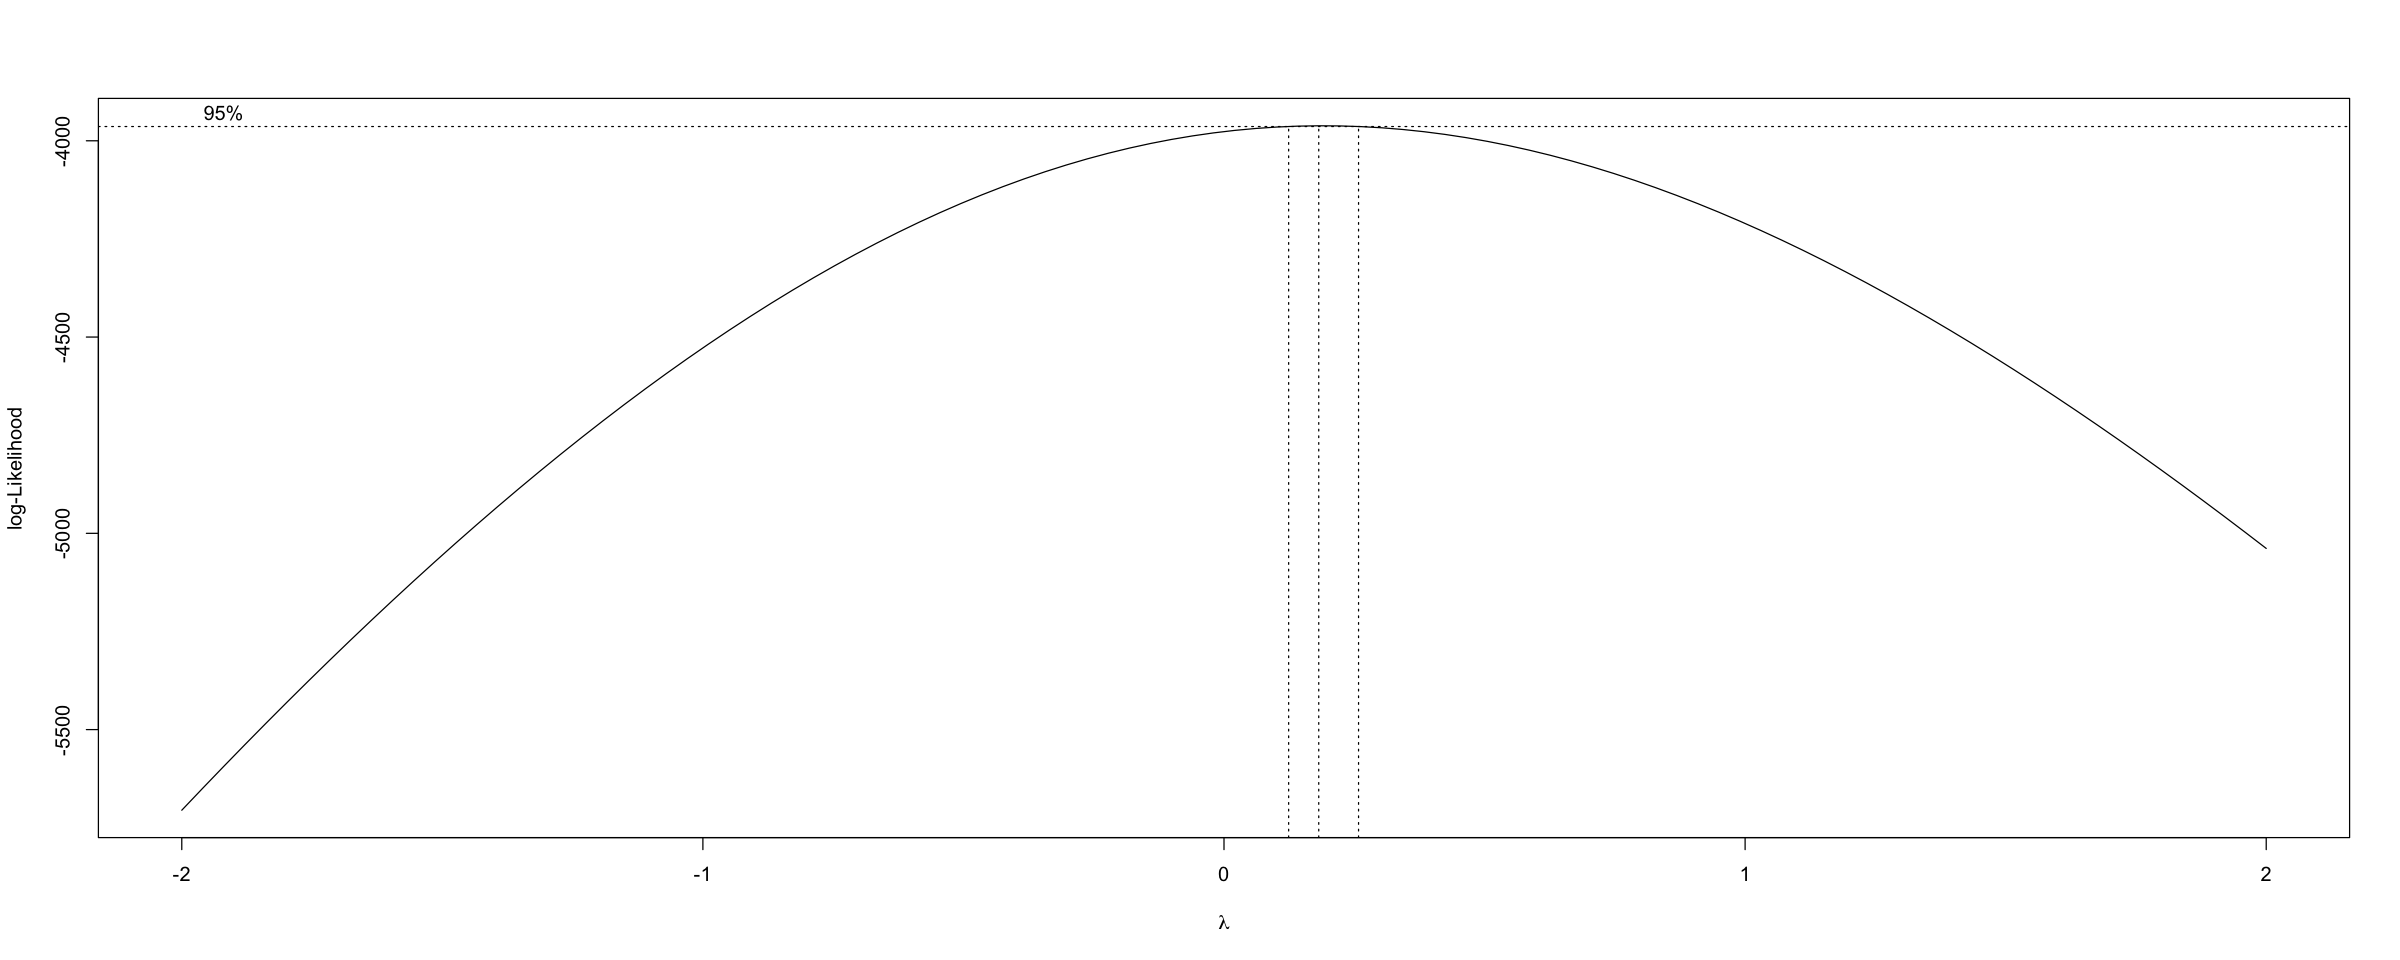

In [24]:
# Tính toán giá trị lambda tốt nhất cho biến đổi Box-Cox
box_cox_trans <- boxcox(charges ~ 1, data = df, plotit = TRUE)

# Lấy giá trị lambda tốt nhất
lambda <- box_cox_trans$x[which.max(box_cox_trans$y)]
print(paste("Best lambda:", lambda))

# Áp dụng biến đổi Box-Cox
df$boxcox_charges <- ifelse(lambda == 0, log(df$charges), (df$charges^lambda - 1) / lambda)

In [25]:
# Tạo một dataframe mới, chứa 3 cột "boxcox_charges", "region", "sex" để tiến hành phân tích tiếp
df_boxcox = df[, c("boxcox_charges", "region", "sex")]
str(df_boxcox)

'data.frame':	1199 obs. of  3 variables:
 $ boxcox_charges: num  26.8 26.8 26.8 26.8 26.8 ...
 $ region        : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ sex           : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...


### MÔ HÌNH NHÂN (SAU BIẾN ĐỔI BOX-COX)

In [26]:
boxcox_int = aov(boxcox_charges~region*sex, data = df)
summary(boxcox_int)

              Df    Sum Sq   Mean Sq F value Pr(>F)
region         3 3.700e-27 1.229e-27   1.040  0.374
sex            1 1.100e-27 1.110e-27   0.940  0.333
region:sex     3 3.500e-27 1.156e-27   0.978  0.402
Residuals   1191 1.408e-24 1.182e-27               

#### NHẬN XÉT:
- Với giả thiết H0: Không có sự tương tác đáng kể giữa region và sex ảnh hưởng đến trung bình phí bảo hiểm (charges).
- Giá trị p-value = 0.371: Lớn hơn 0.05, do đó, không có đủ bằng chứng để bác bỏ giả thiết H0. Không có sự tương tác đáng kể giữa region và sex ảnh hưởng đến trung bình phí bảo hiểm (charges) sau khi biến đổi Box-Cox.

### MÔ HÌNH CỘNG (SAU KHI BIẾN ĐỔI BOX-COX)

In [27]:
boxcox_int = aov(boxcox_charges~region+sex, data = df)
summary(boxcox_int)

              Df    Sum Sq   Mean Sq F value Pr(>F)
region         3 3.700e-27 1.229e-27    1.04  0.374
sex            1 1.100e-27 1.110e-27    0.94  0.333
Residuals   1194 1.411e-24 1.182e-27               

- Biến region:
    - H0: Không có sự khác biệt đáng kể về trung bình phí bảo hiểm (charges) giữa các nhóm region.
    - Giá trị p-value = 0.374: Lớn hơn 0.05, do đó, không có đủ bằng chứng để bác bỏ giả thiết H0. Không có sự khác biệt đáng kể về trung bình phí bảo hiểm (charges) giữa các nhóm region sau khi biến đổi Box-Cox.
- Biến sex:
    - H0: Không có sự khác biệt đáng kể về trung bình phí bảo hiểm (charges) giữa các nhóm sex (nam và nữ).
    - Giá trị p-value = 0.316: Lớn hơn 0.05, do đó, không có đủ bằng chứng để bác bỏ giả thiết H0. Không có sự khác biệt đáng kể về trung bình phí bảo hiểm (charges) giữa nam và nữ sau khi biến đổi Box-Cox.

- Việc biến đổi Box-Cox không làm thay đổi kết luận ban đầu. Sau khi áp dụng biến đổi Box-Cox, vẫn không có sự khác biệt đáng kể về trung bình phí bảo hiểm giữa các nhóm region và sex

### KẾT LUẬN
- Vì kết quả của kiểm định Kruskal-Wallis cho thấy không có sự khác biệt đáng kể giữa trung bình phí bảo hiểm (charges) giữa các nhóm region và sex, nên tôi đã thực hiện thêm biến đổi Box-Cox để củng cố chắc chắn hơn kết quả phân tích này. Kết quả sau khi biến đổi Box-Cox vẫn không cho thấy sự khác biệt đáng kể giữa các nhóm region và sex, xác nhận rằng các nhóm này không có ảnh hưởng đáng kể đến phí bảo hiểm.